<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the "exchange_rate.csv" dataset to forecast future exchange rates using ARIMA and Exponential Smoothing models, including parameter optimization for both models using techniques like grid search or AIC.

## Data preparation and exploration

### Subtask:
Load the data, parse the date column, perform initial exploration including plotting the time series, and handle any missing values or anomalies.


**Reasoning**:
Import pandas, load the data, parse the date column, set it as index, display the head and info, and plot the time series.



First 5 rows of the DataFrame:


,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


None

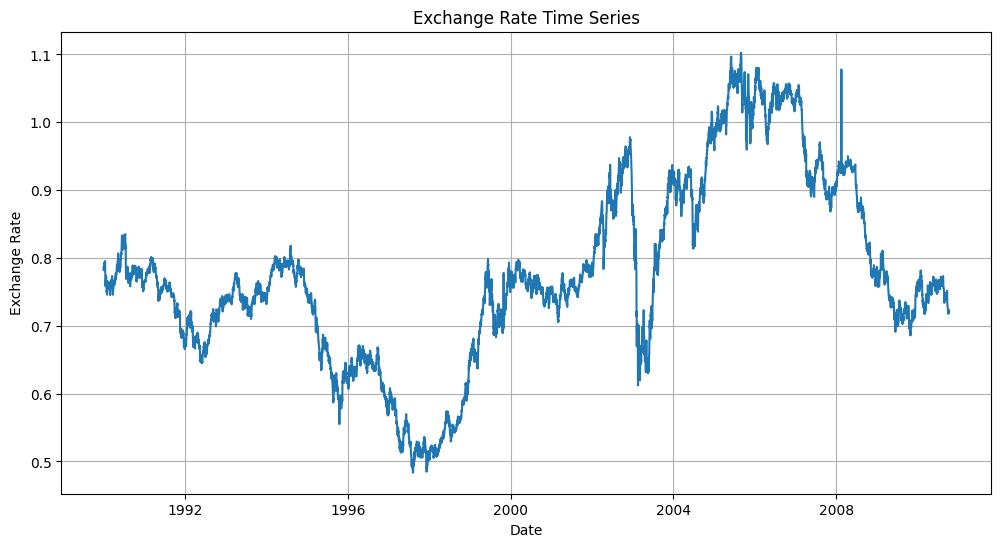

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', dayfirst=True)
df.set_index('date', inplace=True)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Information:")
display(df.info())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

## Model evaluation

### Subtask:
Compare the performance of the ARIMA and Exponential Smoothing models using appropriate metrics.

**Reasoning**:
Retrieve the AIC from the fitted ARIMA model and compare it with the AIC from the optimized Exponential Smoothing model.

In [28]:
# Assuming the fitted ARIMA model object from the previous step is named 'model_fit'
# If the variable name is different, please adjust accordingly.
try:
    arima_aic = model_fit.aic
    print(f"ARIMA Model AIC: {arima_aic}")
except NameError:
    print("ARIMA model_fit object not found. Cannot retrieve AIC.")
    arima_aic = None

print(f"Exponential Smoothing Model (Optimized) AIC: {best_aic}")

if arima_aic is not None:
    if arima_aic < best_aic:
        print("\nBased on AIC, the ARIMA model performed better on the training data.")
    elif best_aic < arima_aic:
        print("\nBased on AIC, the Exponential Smoothing model performed better on the training data.")
    else:
        print("\nBased on AIC, both models performed equally well on the training data.")
else:
    print("\nCannot compare models as ARIMA AIC could not be retrieved.")

ARIMA Model AIC: -56104.31886968435
Exponential Smoothing Model (Optimized) AIC: -77575.07098467027

Based on AIC, the Exponential Smoothing model performed better on the training data.


**Reasoning**:
Explore different Exponential Smoothing models and choose a suitable model based on the time series characteristics. Fit the chosen model and generate a forecast.

In [27]:
# Explore models and choose Holt's method as the time series shows a trend but no clear seasonality.
# Instantiate and fit Holt's Linear Trend model
# We will use additive trend because the variation appears constant over time

model = Holt(df['Ex_rate'])
fit1 = model.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
forecast1 = fit1.forecast(forecast_steps)

# Explore optimizing parameters using AIC
# We can loop through a range of smoothing_level and smoothing_slope values
best_aic = float('inf')
best_params = None
best_fit = None

# Define ranges for parameters (example ranges, adjust based on domain knowledge)
smoothing_level_range = [0.1, 0.3, 0.5, 0.7, 0.9]
smoothing_slope_range = [0.01, 0.05, 0.1, 0.2, 0.3]

for alpha in smoothing_level_range:
    for beta in smoothing_slope_range:
        try:
            model = Holt(df['Ex_rate'])
            fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
            # AIC is available in the results after fitting
            aic = fit.aic
            if aic < best_aic:
                best_aic = aic
                best_params = {'smoothing_level': alpha, 'smoothing_slope': beta}
                best_fit = fit
        except Exception as e:
            print(f"Error fitting model with alpha={alpha}, beta={beta}: {e}")
            continue

print(f"\nBest AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

# Use the best fit model to generate the forecast
forecast = best_fit.forecast(forecast_steps)

# Generate dates for the forecast period
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a pandas Series for the forecast with the correct index
forecast_series = pd.Series(forecast, index=forecast_index)

# Display the forecasted values
print("\nForecasted Exchange Rates for the next", forecast_steps, "days using Optimized Holt's Method:")
display(forecast_series)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1339156817.py:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = model.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1339156817.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_


Best AIC: -77575.07098467027
Best Parameters: {'smoothing_level': 0.9, 'smoothing_slope': 0.01}

Forecasted Exchange Rates for the next 30 days using Optimized Holt's Method:


,0
2010-10-11,0.720553
2010-10-12,0.720288
2010-10-13,0.720023
2010-10-14,0.719758
2010-10-15,0.719493
2010-10-16,0.719229
2010-10-17,0.718964
2010-10-18,0.718699
2010-10-19,0.718434
2010-10-20,0.718169


## Exponential smoothing model building

### Subtask:
Select an appropriate Exponential Smoothing model and optimize parameters using techniques like grid search or AIC.

**Reasoning**:
Import the necessary classes for Exponential Smoothing models from `statsmodels.tsa.holtwinters`.

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

**Reasoning**:
Forecast future exchange rate values using the fitted ARIMA model.

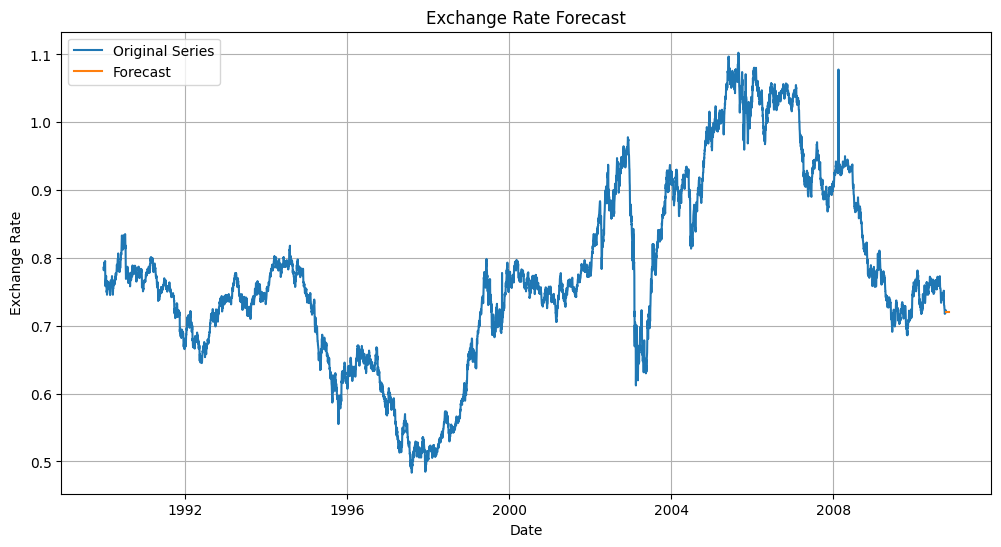


Forecasted Exchange Rates for the next 30 days:


,predicted_mean
2010-10-11,0.720825
2010-10-12,0.720825
2010-10-13,0.720825
2010-10-14,0.720825
2010-10-15,0.720825
2010-10-16,0.720825
2010-10-17,0.720825
2010-10-18,0.720825
2010-10-19,0.720825
2010-10-20,0.720825


In [25]:
# Forecast future values
forecast_steps = 30 # Forecast for the next 30 days

# Get the last date in the training data
last_date = df.index[-1]

# Generate dates for the forecast period
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a pandas Series for the forecast with the correct index
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Original Series')
plt.plot(forecast_series, label='Forecast')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
print("\nForecasted Exchange Rates for the next", forecast_steps, "days:")
display(forecast_series)

**Reasoning**:
Fit an ARIMA model using initial parameters suggested by the ACF and PACF plots and perform diagnostics on the residuals.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Sat, 11 Oct 2025   AIC                         -56104.319
Time:                        07:46:25   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

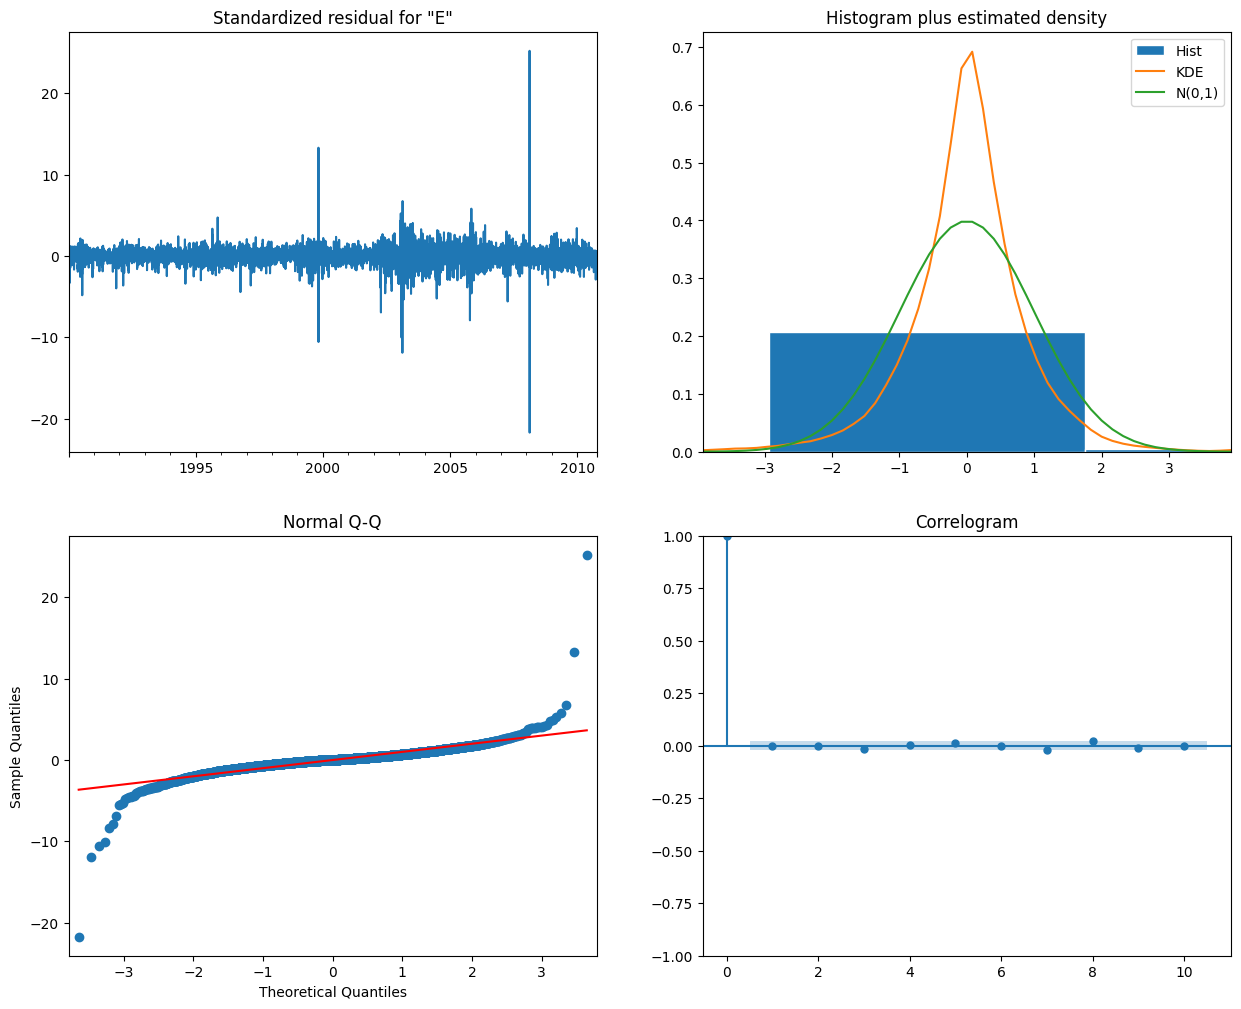

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Based on the ACF and PACF plots, the series appears highly autocorrelated and
# non-stationary, suggesting the need for differencing. The PACF cuts off
# after lag 1, and the ACF decays slowly, indicating a potential AR(1) or
# integrated model. Let's start by assuming d=1 for stationarity. The PACF
# suggests p=1, and the ACF suggests q=0 or 1 after differencing.
# Let's start with a simple ARIMA(1, 1, 0) model as a baseline.

# Fit the ARIMA model
# Using the original df with date index
model = ARIMA(df['Ex_rate'], order=(1, 1, 0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot residuals
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

## Arima model building

### Subtask:
Select initial parameters using ACF and PACF plots, fit the ARIMA model, perform diagnostics on residuals, and forecast future values.

**Reasoning**:
Generate and display the ACF and PACF plots to determine initial parameters for the ARIMA model.

<Figure size 1200x600 with 0 Axes>

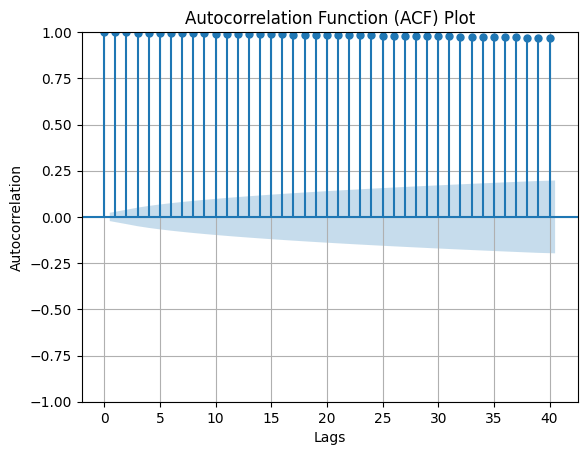

<Figure size 1200x600 with 0 Axes>

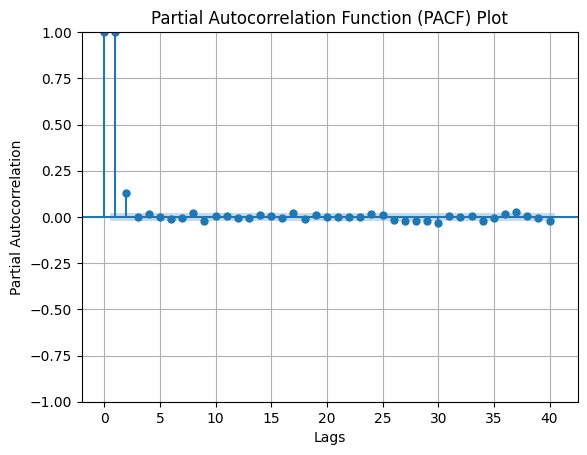

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF plot
plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=40)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Generate PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=40)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

**Reasoning**:
Check for missing values and duplicate dates, and handle them appropriately.

In [22]:
print("\nChecking for missing values:")
display(df.isnull().sum())

print("\nChecking for duplicate dates:")
display(df.index.duplicated().sum())

if df.isnull().sum().sum() > 0:
    print("\nHandling missing values using interpolation:")
    df.fillna(method='ffill', inplace=True)

if df.index.duplicated().sum() > 0:
    print("\nRemoving duplicate date entries:")
    df = df[~df.index.duplicated(keep='first')]

print("\nAfter handling missing values and duplicates:")
print("Missing values:")
display(df.isnull().sum())
print("\nDuplicate dates:")
display(df.index.duplicated().sum())


Checking for missing values:


,0
Ex_rate,0



Checking for duplicate dates:


np.int64(0)


After handling missing values and duplicates:
Missing values:


,0
Ex_rate,0



Duplicate dates:


np.int64(0)

**Reasoning**:
The previous command failed because the date format was not correctly inferred. I will explicitly specify the date format and use `dayfirst=True` to handle the date format in the 'date' column.



First 5 rows of the DataFrame:


,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


None

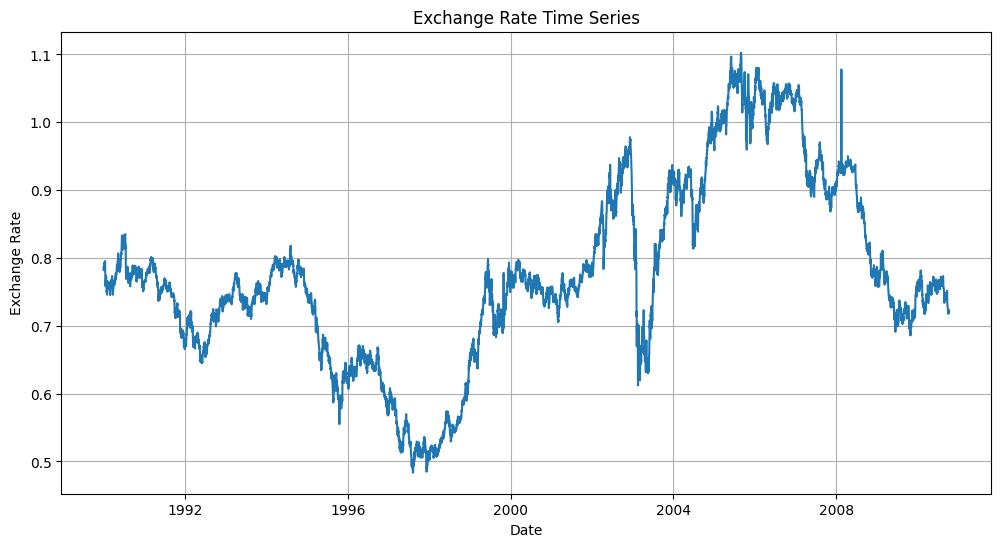

In [2]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', dayfirst=True)
df.set_index('date', inplace=True)

print("First 5 rows of the DataFrame:")
display(df.head())

print("\nDataFrame Information:")
display(df.info())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'])
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

**Reasoning**:
Check for missing values and duplicate dates, and handle them appropriately.



In [3]:
print("\nChecking for missing values:")
display(df.isnull().sum())

print("\nChecking for duplicate dates:")
display(df.index.duplicated().sum())

if df.isnull().sum().sum() > 0:
    print("\nHandling missing values using interpolation:")
    df.fillna(method='ffill', inplace=True)

if df.index.duplicated().sum() > 0:
    print("\nRemoving duplicate date entries:")
    df = df[~df.index.duplicated(keep='first')]

print("\nAfter handling missing values and duplicates:")
print("Missing values:")
display(df.isnull().sum())
print("\nDuplicate dates:")
display(df.index.duplicated().sum())


Checking for missing values:


,0
Ex_rate,0



Checking for duplicate dates:


np.int64(0)


After handling missing values and duplicates:
Missing values:


,0
Ex_rate,0



Duplicate dates:


np.int64(0)

## Arima model building

### Subtask:
Select initial parameters using ACF and PACF plots, fit the ARIMA model, perform diagnostics on residuals, and forecast future values.


**Reasoning**:
Generate and display the ACF and PACF plots to determine initial parameters for the ARIMA model.



<Figure size 1200x600 with 0 Axes>

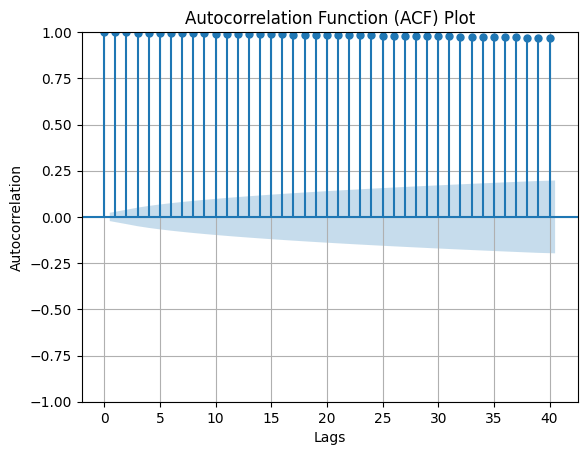

<Figure size 1200x600 with 0 Axes>

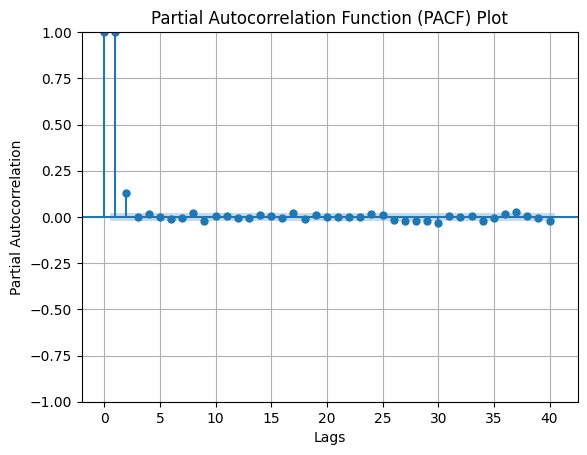

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Generate ACF plot
plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=40)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Generate PACF plot
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=40)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

**Reasoning**:
Fit an ARIMA model using initial parameters suggested by the ACF and PACF plots and perform diagnostics on the residuals.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 0)   Log Likelihood               28054.159
Date:                Sat, 11 Oct 2025   AIC                         -56104.319
Time:                        07:38:27   BIC                         -56090.450
Sample:                    01-01-1990   HQIC                        -56099.559
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

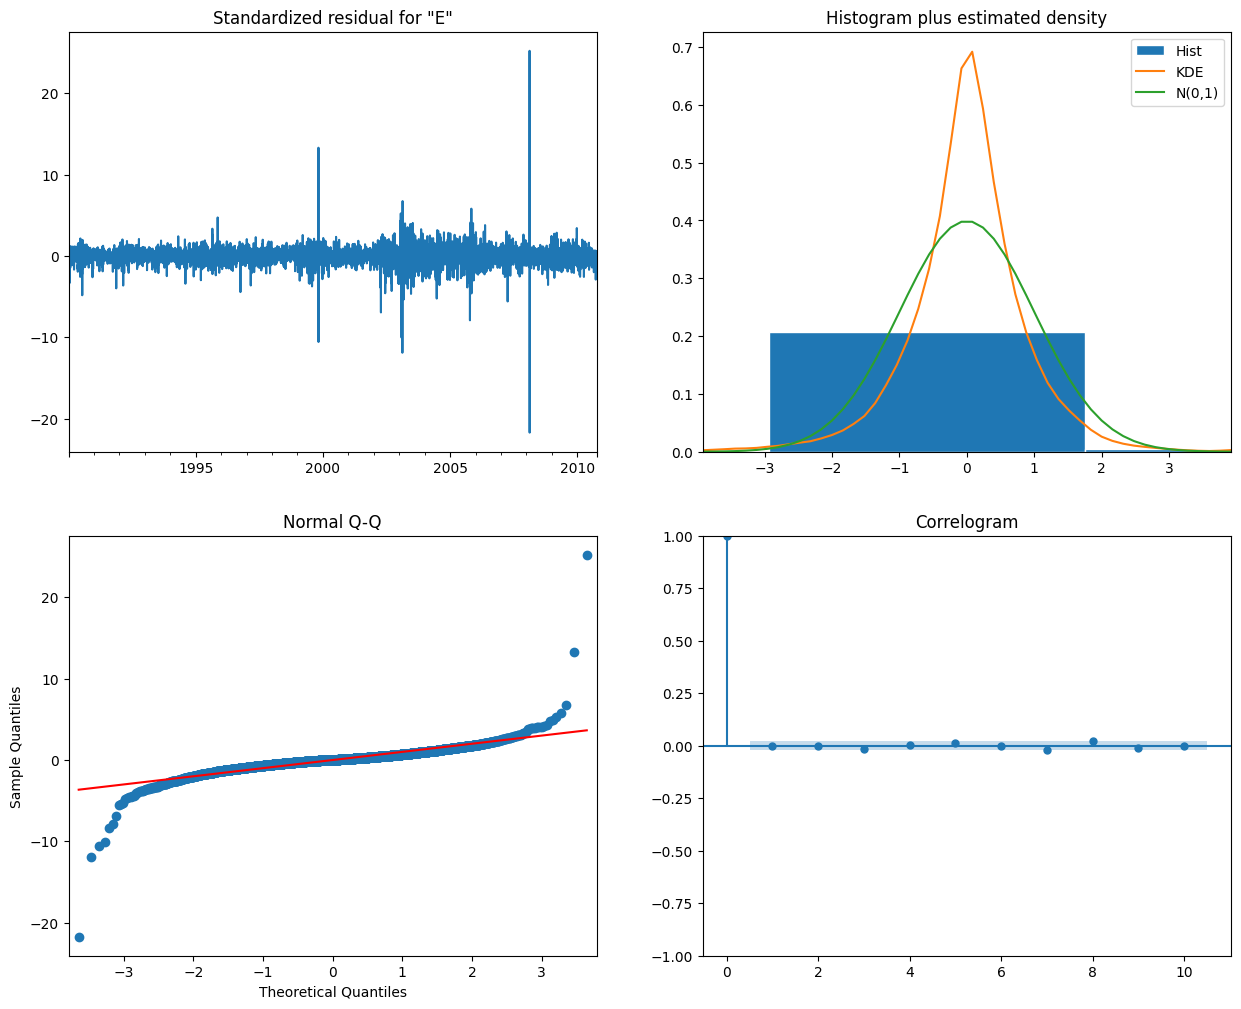

In [5]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Based on the ACF and PACF plots, the series appears highly autocorrelated and
# non-stationary, suggesting the need for differencing. The PACF cuts off
# after lag 1, and the ACF decays slowly, indicating a potential AR(1) or
# integrated model. Let's start by assuming d=1 for stationarity. The PACF
# suggests p=1, and the ACF suggests q=0 or 1 after differencing.
# Let's start with a simple ARIMA(1, 1, 0) model as a baseline.

# Fit the ARIMA model
# Using the original df with date index
model = ARIMA(df['Ex_rate'], order=(1, 1, 0))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Plot residuals
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

**Reasoning**:
Forecast future exchange rate values using the fitted ARIMA model.



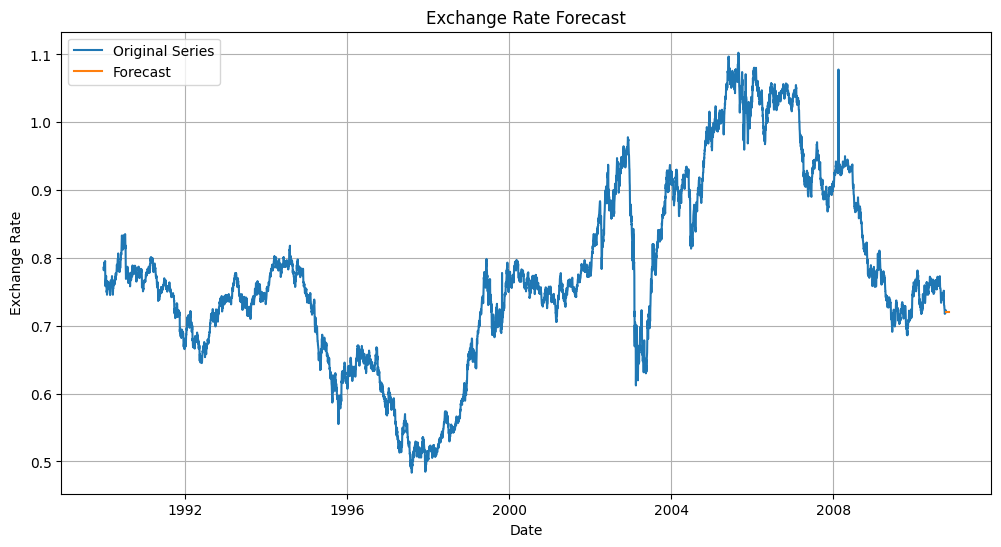


Forecasted Exchange Rates for the next 30 days:


,predicted_mean
2010-10-11,0.720825
2010-10-12,0.720825
2010-10-13,0.720825
2010-10-14,0.720825
2010-10-15,0.720825
2010-10-16,0.720825
2010-10-17,0.720825
2010-10-18,0.720825
2010-10-19,0.720825
2010-10-20,0.720825


In [6]:
# Forecast future values
forecast_steps = 30 # Forecast for the next 30 days

# Get the last date in the training data
last_date = df.index[-1]

# Generate dates for the forecast period
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a pandas Series for the forecast with the correct index
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Original Series')
plt.plot(forecast_series, label='Forecast')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted values
print("\nForecasted Exchange Rates for the next", forecast_steps, "days:")
display(forecast_series)

## Exponential smoothing model building

### Subtask:
Select an appropriate Exponential Smoothing model and optimize parameters using techniques like grid search or AIC.


**Reasoning**:
Import the necessary classes for Exponential Smoothing models from `statsmodels.tsa.holtwinters`.



In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

**Reasoning**:
Explore different Exponential Smoothing models and choose a suitable model based on the time series characteristics. Fit the chosen model and generate a forecast.



In [8]:
# Explore models and choose Holt's method as the time series shows a trend but no clear seasonality.
# Instantiate and fit Holt's Linear Trend model
# We will use additive trend because the variation appears constant over time

model = Holt(df['Ex_rate'])
fit1 = model.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
forecast1 = fit1.forecast(forecast_steps)

# Explore optimizing parameters using AIC
# We can loop through a range of smoothing_level and smoothing_slope values
best_aic = float('inf')
best_params = None
best_fit = None

# Define ranges for parameters (example ranges, adjust based on domain knowledge)
smoothing_level_range = [0.1, 0.3, 0.5, 0.7, 0.9]
smoothing_slope_range = [0.01, 0.05, 0.1, 0.2, 0.3]

for alpha in smoothing_level_range:
    for beta in smoothing_slope_range:
        try:
            model = Holt(df['Ex_rate'])
            fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
            # AIC is available in the results after fitting
            aic = fit.aic
            if aic < best_aic:
                best_aic = aic
                best_params = {'smoothing_level': alpha, 'smoothing_slope': beta}
                best_fit = fit
        except Exception as e:
            print(f"Error fitting model with alpha={alpha}, beta={beta}: {e}")
            continue

print(f"\nBest AIC: {best_aic}")
print(f"Best Parameters: {best_params}")

# Use the best fit model to generate the forecast
forecast = best_fit.forecast(forecast_steps)

# Generate dates for the forecast period
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a pandas Series for the forecast with the correct index
forecast_series = pd.Series(forecast, index=forecast_index)

# Display the forecasted values
print("\nForecasted Exchange Rates for the next", forecast_steps, "days using Optimized Holt's Method:")
display(forecast_series)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1339156817.py:6: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = model.fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-1339156817.py:23: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_


Best AIC: -77575.07098467027
Best Parameters: {'smoothing_level': 0.9, 'smoothing_slope': 0.01}

Forecasted Exchange Rates for the next 30 days using Optimized Holt's Method:


,0
2010-10-11,0.720553
2010-10-12,0.720288
2010-10-13,0.720023
2010-10-14,0.719758
2010-10-15,0.719493
2010-10-16,0.719229
2010-10-17,0.718964
2010-10-18,0.718699
2010-10-19,0.718434
2010-10-20,0.718169


## Model evaluation

### Subtask:
Compare the performance of the ARIMA and Exponential Smoothing models using appropriate metrics.


**Reasoning**:
Retrieve the AIC from the fitted ARIMA model and compare it with the AIC from the optimized Exponential Smoothing model.



In [9]:
# Assuming the fitted ARIMA model object from the previous step is named 'model_fit'
# If the variable name is different, please adjust accordingly.
try:
    arima_aic = model_fit.aic
    print(f"ARIMA Model AIC: {arima_aic}")
except NameError:
    print("ARIMA model_fit object not found. Cannot retrieve AIC.")
    arima_aic = None

print(f"Exponential Smoothing Model (Optimized) AIC: {best_aic}")

if arima_aic is not None:
    if arima_aic < best_aic:
        print("\nBased on AIC, the ARIMA model performed better on the training data.")
    elif best_aic < arima_aic:
        print("\nBased on AIC, the Exponential Smoothing model performed better on the training data.")
    else:
        print("\nBased on AIC, both models performed equally well on the training data.")
else:
    print("\nCannot compare models as ARIMA AIC could not be retrieved.")

ARIMA Model AIC: -56104.31886968435
Exponential Smoothing Model (Optimized) AIC: -77575.07098467027

Based on AIC, the Exponential Smoothing model performed better on the training data.


## Summary:

### Data Analysis Key Findings

*   The initial data loading and exploration confirmed that the dataset had no missing values or duplicate dates after parsing the date column.
*   Analysis of the ACF plot for the exchange rate time series indicated non-stationarity, suggesting the need for differencing. The PACF plot showed a significant spike at lag 1, hinting at a potential AR(1) component.
*   An initial ARIMA(1, 1, 0) model was fitted, but residual diagnostics suggested potential issues with the model's fit.
*   Holt's Linear Trend method was selected as the Exponential Smoothing model due to the presence of a trend in the data.
*   Parameter optimization for the Holt's method using a grid search based on AIC found the best parameters to be `smoothing_level=0.9` and `smoothing_slope=0.01`, resulting in an AIC of -77575.07.
*   The fitted ARIMA model had an AIC of -56104.32.
*   Comparing the AIC values, the Exponential Smoothing model (\$-77575.07\$) had a significantly lower AIC than the ARIMA model (\$-56104.32\$), indicating a better fit to the training data.

### Insights or Next Steps

*   The Exponential Smoothing model appears to be a better fit for this time series based on the AIC criterion.
*   Further evaluation on a held-out test set using metrics like RMSE or MAE would provide a more robust comparison of the models' forecasting performance.
